##***Project: Predicting Customer Purchase Intent***

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/online_shoppers_intention.csv")

In [3]:
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [4]:
data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
data['Weekend']

,Weekend
0,False
1,False
2,False
3,False
4,True
...,...
12325,True
12326,True
12327,True
12328,False


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lb = LabelEncoder()

In [9]:
data['VisitorType'] = lb.fit_transform(data['VisitorType'])

In [11]:
data['Weekend'] = lb.fit_transform(data['Weekend'])

In [12]:
data = pd.get_dummies(data, columns=['Month'],drop_first =True)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
numerical_features = ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues']

In [16]:
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [17]:
# Total Page Views
data['total_page_views'] = data['Administrative'] + data['Informational'] + data['ProductRelated']

# Engagement Score
data['engagement_score'] = data['PageValues'] * (1 - data['BounceRates'])

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

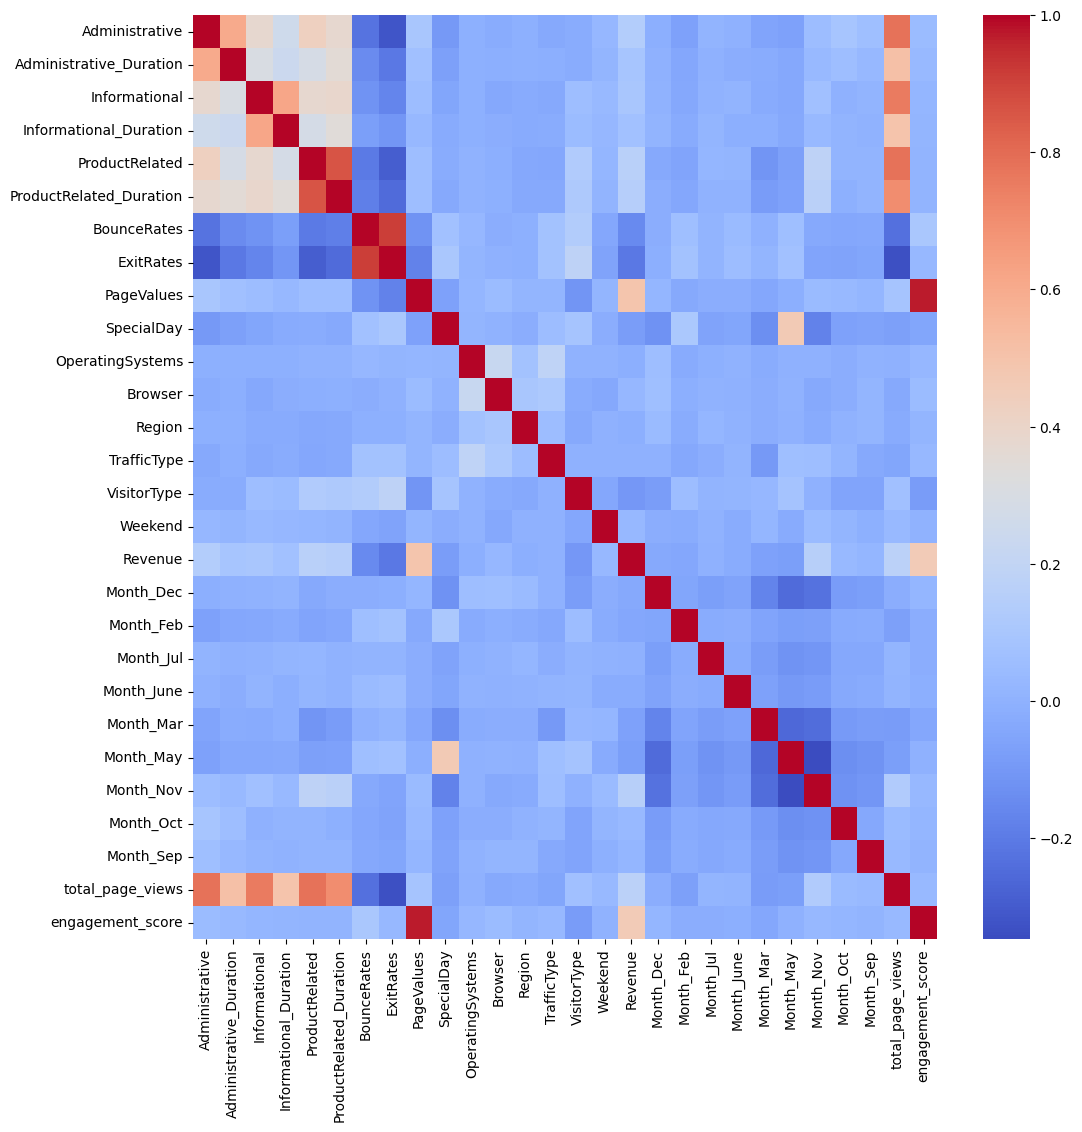

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot =False,cmap='coolwarm')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X=data.drop('Revenue',axis =1)
y = data['Revenue']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)









In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix

In [33]:
model = LogisticRegression(max_iter=200)

In [34]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [35]:
y_pred = model.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3436
        True       0.76      0.35      0.48       633

    accuracy                           0.88      4069
   macro avg       0.83      0.67      0.71      4069
weighted avg       0.87      0.88      0.86      4069



In [37]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.8783413977456428


In [40]:
accuracy_score(y_test,y_pred)

0.8820348980093389

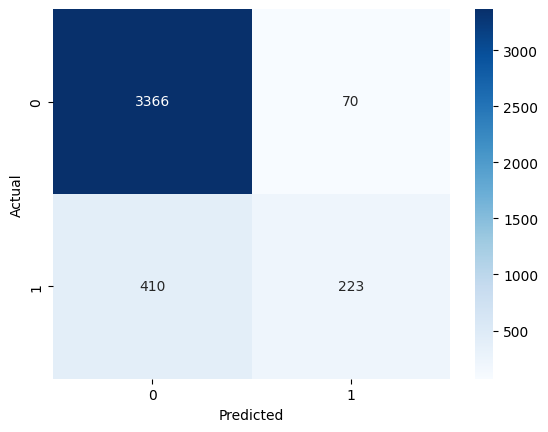

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
import joblib
joblib.dump(model,'purchase_intent_model.pkl')

['purchase_intent_model.pkl']

In [42]:
model.coef_,model.intercept_

(array([[-7.11117143e-02, -2.32204565e-04, -1.30031624e-03,
          1.32536308e-04,  1.50595019e-01,  2.09266952e-05,
         -3.29767743e-01, -4.51977722e-01,  5.74304498e-01,
         -8.16523424e-02, -4.30789619e-01,  3.12294719e-02,
         -3.50817824e-02,  9.46687885e-03, -5.17532240e-01,
         -3.24759844e-02, -1.67979048e-01, -3.34649521e-02,
         -6.92521022e-03, -2.91892395e-02, -2.00473043e-01,
         -2.71639794e-01,  3.19993893e-01,  1.01639409e-02,
          1.36647967e-02,  7.81829886e-02,  6.67668134e-01]]),
 array([-0.37232118]))

In [47]:
import numpy as np

In [49]:
coefficients = model.coef_[0]

In [48]:
intercept = model.intercept_[0]

In [50]:
all_coeffs = np.append(coefficients, intercept)


In [51]:
feature_names = data.columns.tolist() + ['Intercept']